In [38]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import median_filter

In [2]:
with open ("filtro_1.pkl", mode ='rb') as f:
        series = pickle.load(f) # dados brutos depois do filtro média móvel

In [31]:
series = np.array(series)
series = series[0,:,:]

## Algoritmo dos filtros

In [39]:
def mediana_filter(series, size):
    return median_filter(series, size=size)

In [56]:
def moving_avg_filter(series):
	moving_avg = {}

	for key in series.keys():                 #window=10 ###############################################################
		moving_avg[key] = series[key].rolling(window=10, min_periods=1, center=True).mean()

	moving_avg = pd.DataFrame(moving_avg)
	return moving_avg

In [4]:
def plot(series, title):
	f, ax = plt.subplots()
	plt.plot(series)
	ax.set(xlabel='Samples', ylabel='dB', title=title)
	plt.show()

## Com filtro média móvel duas vezes

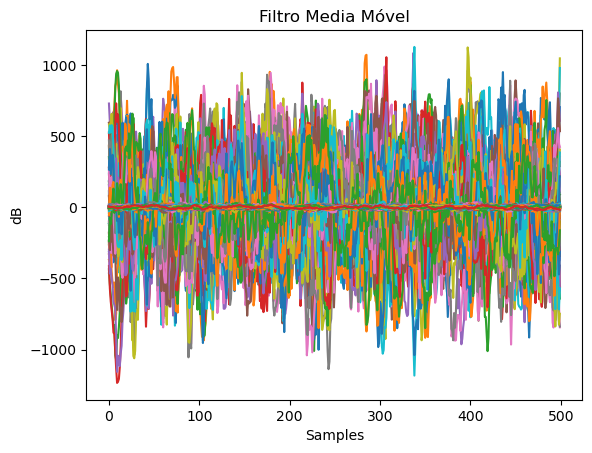

In [32]:
plot(series, "Filtro Media Móvel")

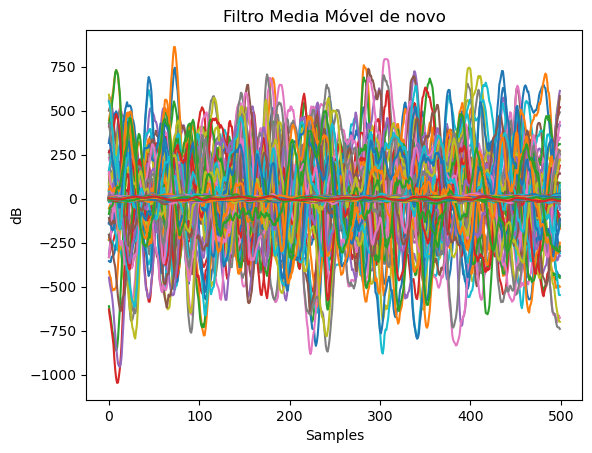

In [58]:
s = moving_avg_filter(pd.DataFrame(series))
plot(s, 'Filtro Media Móvel de novo')

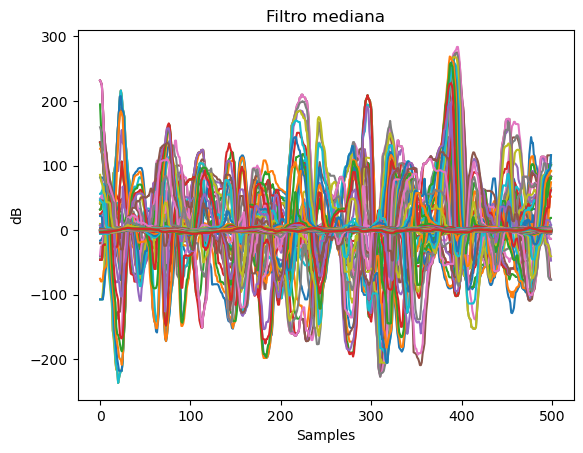

In [61]:
plot(mediana_filter(s, 15), "Filtro mediana")

## Com filtro média móvel uma vez

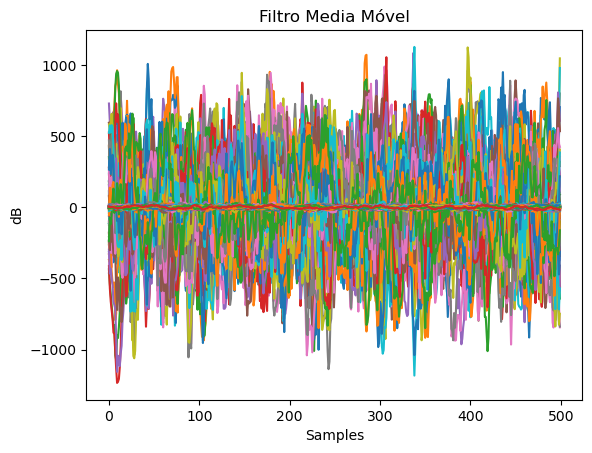

In [62]:
plot(series, "Filtro Media Móvel")

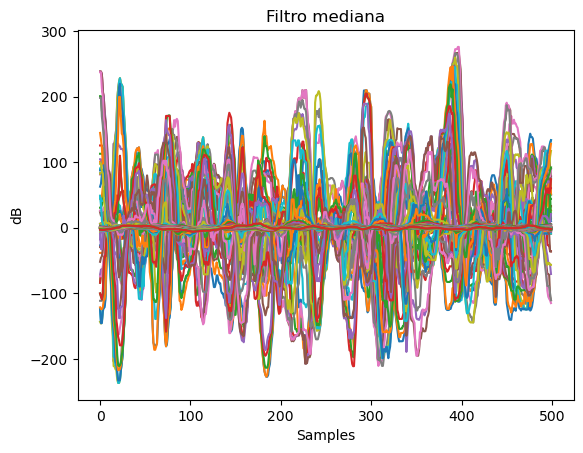

In [63]:
plot(mediana_filter(series, 15), "Filtro mediana")